References: https://docs.pymc.io/notebooks/dp_mix.html

In [40]:
import arviz as az
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from matplotlib import pyplot as plt

In [41]:
%config InlineBackend.figure_format = 'retina'
blue, *_ = sns.color_palette()
az.style.use("arviz-darkgrid")
SEED = 5132290  # from random.org
np.random.seed(SEED)

In [42]:
N = 20
K = 30

alpha = 2
P0 = sp.stats.norm
f = lambda x, theta: sp.stats.norm.pdf(x, theta, 0.3)

In [43]:
beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

x_plot = np.linspace(-3, 3, 200)

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

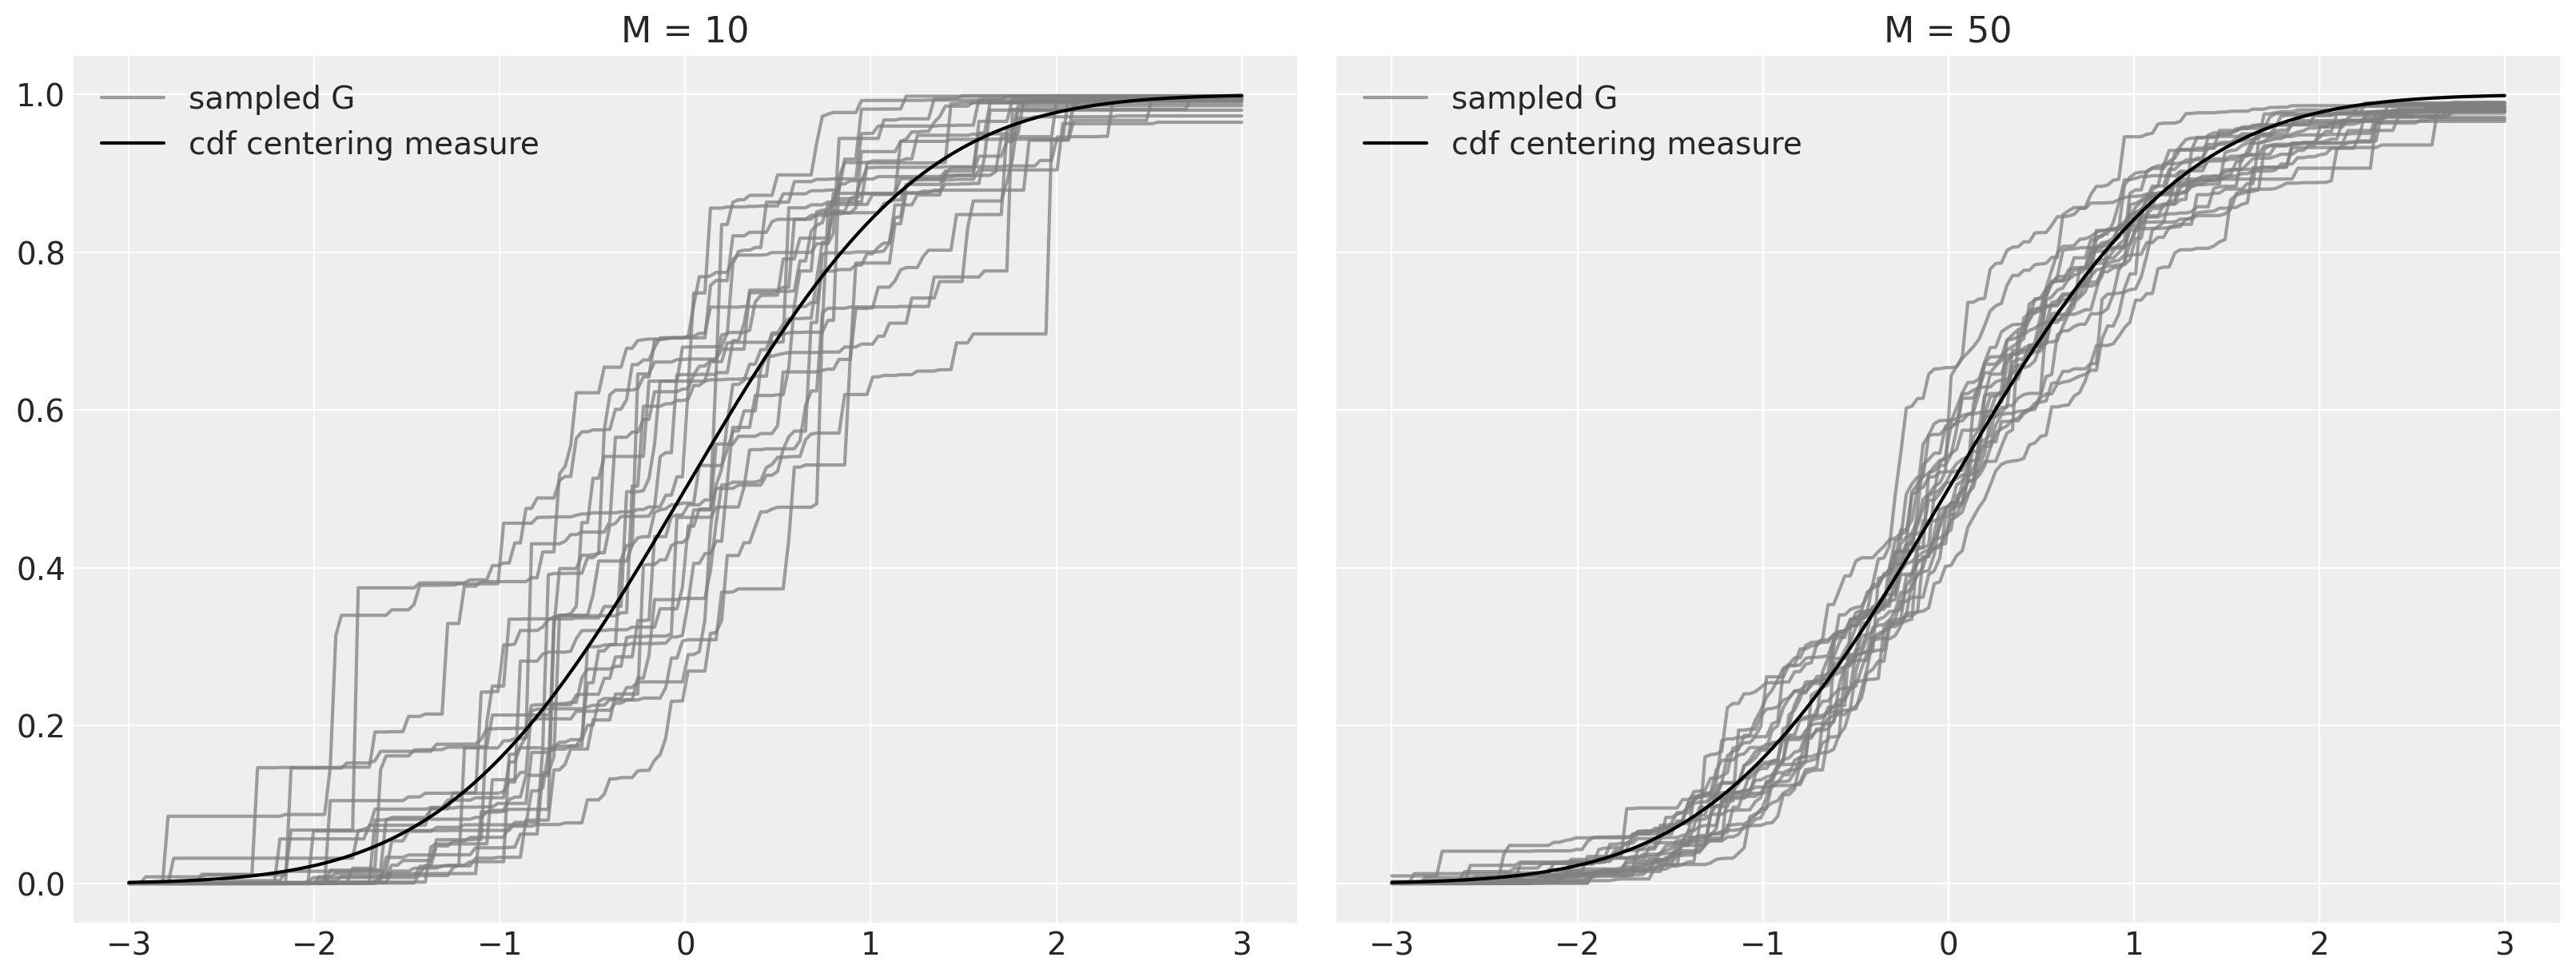

In [44]:
fig, (l_ax, r_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

K = 50
alpha = 10.0

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

l_ax.plot(x_plot, sample_cdfs[0], c="gray", alpha=0.75, label="sampled G")
l_ax.plot(x_plot, sample_cdfs[1:].T, c="gray", alpha=0.75)
l_ax.plot(x_plot, P0.cdf(x_plot), c="k", label="cdf centering measure")

l_ax.set_title(f"M = {int(alpha)}")
l_ax.legend(loc=2)

K = 200
alpha = 50.0

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

r_ax.plot(x_plot, sample_cdfs[0], c="gray", alpha=0.75, label="sampled G")
r_ax.plot(x_plot, sample_cdfs[1:].T, c="gray", alpha=0.75)
r_ax.plot(x_plot, P0.cdf(x_plot), c="k", label="cdf centering measure")

r_ax.set_title(f"M = {int(alpha)}")
r_ax.legend(loc=2);